In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from bucket import create_bucket_synopsis, bucket_using_privacy_accountant, Params
from evaluation_utils import kmeans_loss
from lloyd import lloyd_with_weights, dplloyd, PrivacyBudget
from grid import create_grid_synopsis
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

master_rng = np.random.default_rng(42)

def lsh_experiment(algo: int, data: np.ndarray, p: Params, n_trials: int = 20):
    s = master_rng.integers(low=0, high=100000)
    total_loss = 0
    n_successful_trials = n_trials
    for x in range(n_trials):
        if algo == 1:
            print("starting synopsis... ")
            private_points, private_weights = create_bucket_synopsis(data, p, s+x)
        else:
            private_points, private_weights = create_bucket_synopsis(data, p, s+x)
        if private_points.shape[0] <= p.k: # if number of points is less than or equal to desired number of centers
            centers = private_points
        else:
            centers = lloyd_with_weights(k=p.k, X=private_points, weights=private_weights, n_iter=5, rs=s+x)
        try:
            loss = kmeans_loss(centers, data)
        except:
            loss = 0
            n_successful_trials -=1
        total_loss += loss
        print(f"Trial {x+1} done")
    print("Number completed trials: ", n_successful_trials)
    return total_loss / n_successful_trials

# one function to apply grid synopsis and then non-private kmeans
def cluster_grid(data: np.ndarray, k: int, e:float, M:int, seed:int) -> np.ndarray:

    grid_synopsis = create_grid_synopsis(data, e, data.shape[1], M, seed)

    centers = lloyd_with_weights(k=k, X=grid_synopsis[:,:-1], weights=grid_synopsis[:,-1], n_iter=10, rs = seed)

    return centers

def grid_experiment(data: np.ndarray, k: int, e:float, M:int, n_trials: int = 20) -> float:

    s = master_rng.integers(low=0, high=100000)
    total_loss = 0

    for x in range(0, n_trials):
        centers = cluster_grid(data, k, e, M, s + x)
        total_loss += kmeans_loss(centers, data)

    return total_loss / n_trials

def dplloyd_experiment(X, k, epsilon, method, iterations, trials=20, output=False):
    p = PrivacyBudget(epsilon=epsilon, method=method, total_iter=iterations)
    # do 20 randomised trials
    base_seed = master_rng.integers(low=0, high=100000)
    trials = [dplloyd(k=k, X=X, n_iter=iterations, priv=p, seed=base_seed + x) for x in range(20)]
    losses = [kmeans_loss(centers, X) for centers in trials]
    avg_loss = np.mean(losses)
    if output: 
        print(f"base seed={base_seed}, average loss={avg_loss}")
    return avg_loss

def non_private_radius(x: np.ndarray) -> float:
    return np.max(np.linalg.norm(x, axis=-1))

plt.style.use('seaborn-v0_8') 

In [2]:
def plot_algos(data: np.ndarray, ks: list, lloyd_iters: int, M: int, title: str, num_randomised_trials: int = 50):
    dpl = []
    grid = []
    lsh = []

    for k in ks:
        dpl.append(dplloyd_experiment(X=data, k=k, epsilon=1, method="dichotomy", iterations=lloyd_iters, trials=num_randomised_trials))
        grid.append(grid_experiment(data, k=k, e=1, M=M, n_trials=num_randomised_trials))
        p = Params(epsilon=1, delta=1e-6, radius=non_private_radius(data), dimension=data.shape[1], k=k)
        lsh.append(lsh_experiment(algo=1, data=data, p=p, n_trials=num_randomised_trials))

    plt.plot(ks, dpl, c="blue")
    plt.plot(ks, grid, c="orange")
    plt.plot(ks, lsh, c="green")
    plt.xlabel("K")
    plt.ylabel("K-means loss over 50 randomised trials")
    plt.legend(["DPLloyd", "Grid", "LSH"])
    plt.title(title)

For each dataset, plot the k-means loss of each algorithm over a variety of different ks. Use the best found parameters in the previous analysis.

- Blue: DPLloyd
- Orange: Grid
- Green: LSH 

## Plot 1 : Small Synthetic (k=1,2,3,4,5)

## Plot 2: Airports (k=3,4,5,6,7,8,9,10)

## Plot 3: Iris (k=2,3,4,5,6)

## Plot 4: Large Synthetic (k=7,8,9,10,11,12,13)

## Plot 5: Concrete (k=3,4,5,6,7,8)

## Plot 6: Forest (k=1,2,3,4,5)



starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 183 
 include_threshold: 61
Trial 1 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 183 
 include_threshold: 61
Trial 2 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 183 
 include_threshold: 61
Trial 3 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 183 
 include_threshold: 61
Trial 4 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 183 
 include_threshold: 61
Trial 5 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 183 
 include_threshold: 61
Trial 6 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 183 
 include_threshold: 61
Trial 7 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 183 
 include_threshold: 61
Trial 8 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching

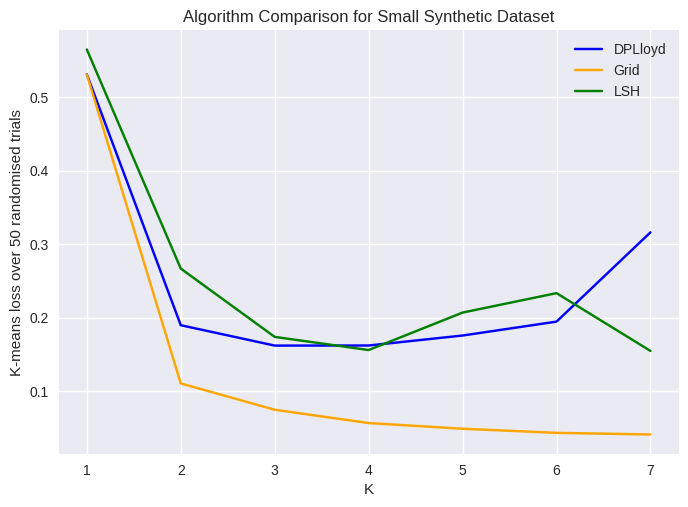

In [3]:
small = np.load("datasets/synthetic-gaussian.npy")
plot_algos(small, list(range(1,8)), lloyd_iters=1, M=7, title="Algorithm Comparison for Small Synthetic Dataset")

starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 156 
 include_threshold: 52
Trial 1 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 156 
 include_threshold: 52
Trial 2 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 156 
 include_threshold: 52
Trial 3 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 156 
 include_threshold: 52
Trial 4 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 156 
 include_threshold: 52
Trial 5 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 156 
 include_threshold: 52
Trial 6 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 156 
 include_threshold: 52
Trial 7 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 156 
 include_threshold: 52
Trial 8 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching

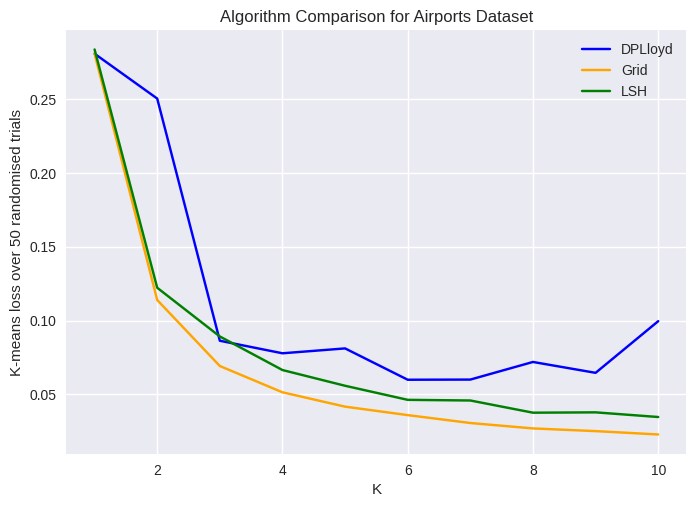

In [4]:
airports = np.load("datasets/airports.npy")
plot_algos(airports, list(range(1,11)), lloyd_iters=1, M=20, title="Algorithm Comparison for Airports Dataset")

starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 174 
 include_threshold: 58
Trial 1 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 174 
 include_threshold: 58
Trial 2 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 174 
 include_threshold: 58
Trial 3 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 174 
 include_threshold: 58
Trial 4 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 174 
 include_threshold: 58
Trial 5 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 174 
 include_threshold: 58
Trial 6 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 174 
 include_threshold: 58
Trial 7 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 174 
 include_threshold: 58
Trial 8 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching

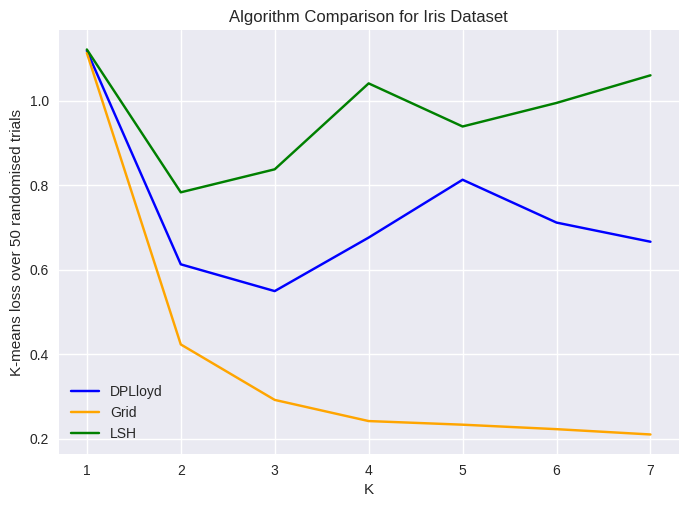

In [5]:
iris = np.load("datasets/iris.npy")
plot_algos(iris, list(range(1,8)), lloyd_iters=1, M=3, title="Algorithm Comparison for Iris Dataset")

starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 318 
 include_threshold: 106
Trial 1 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 318 
 include_threshold: 106
Trial 2 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 318 
 include_threshold: 106
Trial 3 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 318 
 include_threshold: 106
Trial 4 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 318 
 include_threshold: 106
Trial 5 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 318 
 include_threshold: 106
Trial 6 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 318 
 include_threshold: 106
Trial 7 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 318 
 include_threshold: 106
Trial 8 done
starting synopsis... 
Parameters used 
 max depth: 20
 b

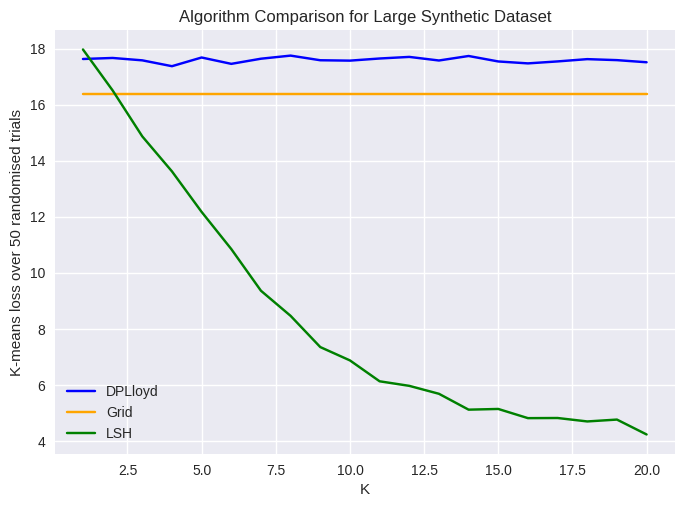

In [6]:
large = np.load("datasets/large-synthetic.npy")
plot_algos(large, list(range(1,21)), lloyd_iters=5, M=1, title="Algorithm Comparison for Large Synthetic Dataset")

starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 165 
 include_threshold: 55
Trial 1 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 165 
 include_threshold: 55
Trial 2 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 165 
 include_threshold: 55
Trial 3 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 165 
 include_threshold: 55
Trial 4 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 165 
 include_threshold: 55
Trial 5 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 165 
 include_threshold: 55
Trial 6 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 165 
 include_threshold: 55
Trial 7 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 165 
 include_threshold: 55
Trial 8 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching

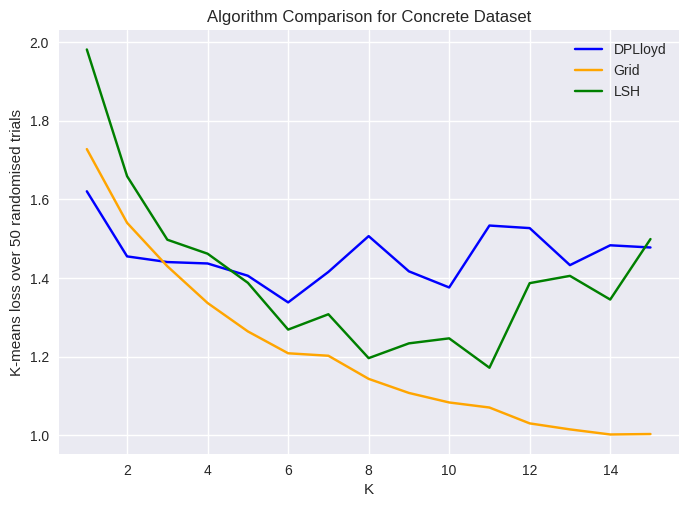

In [7]:
concrete = np.load("datasets/concrete.npy")
plot_algos(concrete, list(range(1,16)), lloyd_iters=2, M=3, title="Algorithm Comparison for Concrete Dataset")


starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 192 
 include_threshold: 64
Trial 1 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 192 
 include_threshold: 64
Trial 2 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 192 
 include_threshold: 64
Trial 3 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 192 
 include_threshold: 64
Trial 4 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 192 
 include_threshold: 64
Trial 5 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 192 
 include_threshold: 64
Trial 6 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 192 
 include_threshold: 64
Trial 7 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching threshold: 192 
 include_threshold: 64
Trial 8 done
starting synopsis... 
Parameters used 
 max depth: 20
 branching

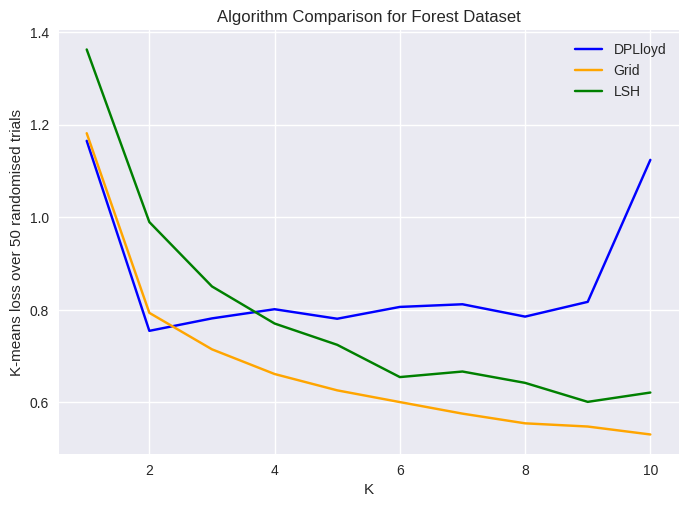

In [8]:
forest = np.load("datasets/forest.npy")
plot_algos(forest, ks = list(range(1,11)), lloyd_iters=4, M=3, title="Algorithm Comparison for Forest Dataset")